## Import

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
% matplotlib inline
from sklearn.metrics import r2_score,accuracy_score

## Importing dataset

In [3]:
data = pd.read_csv('ibm.csv')

In [5]:
data.shape

(1509, 7)

## Spliting data

In [12]:
data_train = data[0:1309]

In [14]:
data_test = data[1309:1509]

In [16]:
training_set = data_train.iloc[:,1:2].values

## Scaling Dataset

In [17]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [18]:
training_set_scaled.shape

(1309, 1)

In [19]:
X_train = []
y_train = []
for i in range(60, 1300):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [20]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

## Building and training RNN

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences= True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer='adam', loss='mean_squared_error')

regressor.fit(X_train, y_train, epochs=100, batch_size=32)

C:\Users\shubham\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Epoch 1/100
1240/1240 [==============================] - 5s 4ms/step - loss: 0.0605
Epoch 2/100
1240/1240 [==============================] - 3s 2ms/step - loss: 0.0104
Epoch 3/100
1240/1240 [==============================] - 3s 2ms/step - loss: 0.0079
Epoch 4/100
1240/1240 [==============================] - 3s 2ms/step - loss: 0.0073
Epoch 5/100
1240/1240 [==============================] - 3s 2ms/step - loss: 0.0070
Epoch 6/100
1240/1240 [==============================] - 3s 2ms/step - loss: 0.0064
Epoch 7/100
1240/1240 [==============================] - 3s 2ms/step - loss: 0.0064
Epoch 8/100
1240/1240 [==============================] - 3s 2ms/step - loss: 0.0058
Epoch 9/100
1240/1240 [==============================] - 3s 2ms/step - loss: 0.0062
Epoch 10/100
1240/1240 [==============================] - 3s 2ms/step - loss: 0.0051
Epoch 11/100
1240/1240 [==============================] - 3s 2ms/step - loss: 0.0050
Epoch 12/100
1240/1240 [==============================] - 3s 2ms/step - lo

Epoch 97/100
1240/1240 [==============================] - 3s 3ms/step - loss: 0.0014
Epoch 98/100
1240/1240 [==============================] - 3s 2ms/step - loss: 0.0015
Epoch 99/100
1240/1240 [==============================] - 3s 2ms/step - loss: 0.0015
Epoch 100/100
1240/1240 [==============================] - 3s 2ms/step - loss: 0.0017


## Predicting on test dataset

In [23]:
real_stock_price = data_test.iloc[:, 1:2].values

In [25]:
dataset_total = pd.concat((data_train['Open'],data_test['Open']),axis=0)
inputs = dataset_total[len(dataset_total) - len(data_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,260):
    X_test.append(inputs[i-60:i,0])

In [26]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

## Evaluating Model

In [29]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(real_stock_price, predicted_stock_price))
print('MSE:', metrics.mean_squared_error(real_stock_price, predicted_stock_price))
print('RMSE:', np.sqrt(metrics.mean_squared_error(real_stock_price, predicted_stock_price)))
print(metrics.r2_score(real_stock_price, predicted_stock_price))

MAE: 2.095480595424805
MSE: 7.917390509173702
RMSE: 2.8137857966045856
0.8215072046693298


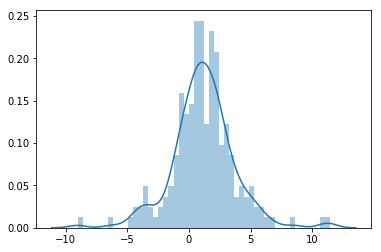

In [31]:
import seaborn as sns
sns.distplot(real_stock_price-predicted_stock_price, bins=50, kde=True)

## Plotting the graph of predicted against real srock price

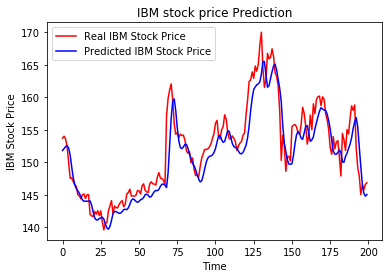

In [27]:
plt.plot(real_stock_price, color = 'red', label = 'Real IBM Stock Price')
plt.plot(predicted_stock_price,color='blue', label = 'Predicted IBM Stock Price')
plt.title('IBM stock price Prediction')
plt.xlabel('Time')
plt.ylabel('IBM Stock Price')
plt.legend()
plt.show()

## Thank You!